In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.graph_objects as go
from tqdm.auto import tqdm
from scipy.stats import pearsonr
from tools.analysis import *

# mpl.use('pgf')
# mpl.rcParams.update({
#     "pgf.texsystem": "pdflatex",  # Use pdflatex for rendering
#     'font.family': 'serif',       # Use serif font family
#     'text.usetex': True,          # Use LaTeX for text rendering
#     'pgf.rcfonts': False,         # Don't setup fonts from rc params
#     'pgf.preamble': r'\usepackage{amsmath,amsfonts,amssymb}\usepackage[T2A,T1]{fontenc}\usepackage[utf8]{inputenc}\usepackage[ukrainian]{babel}',  # Use Ukrainian Cyrillic font
#     'font.size': 10               # Set font size
# })

In [2]:
from scipy.signal import savgol_filter, detrend
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle

In [3]:
domain = pd.read_csv('data/domain.csv')
df = pd.read_csv('data/dataset.csv')
X = df.drop(columns=['HbA1c', 'years'])
y = df['HbA1c']
X.columns = np.ravel(domain)

#X = X.apply(lambda row: row / max(row), axis=1)
X = X.T.apply(lambda col: savgol_filter(col, window_length=25, polyorder=2, deriv=2)).T
X = X.apply(lambda row: row / np.linalg.norm(row), axis=1)

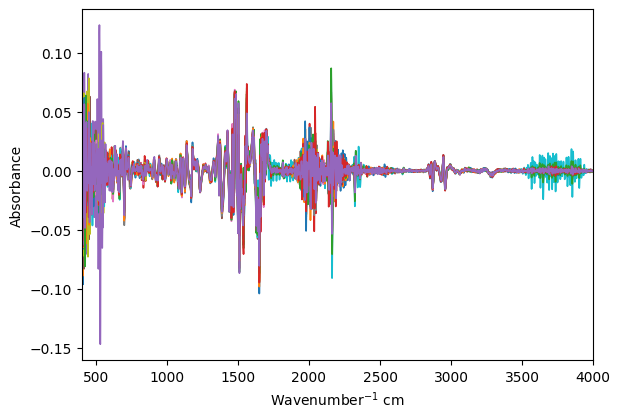

In [4]:
sample_15 = X.sample(n=15, random_state=25)

plt.figure(figsize=(6.6, 4.5))
plt.plot(sample_15.T, linewidth=1.2)
plt.xlabel("Wavenumber$^{-1}$ cm")
plt.ylabel("Absorbance")
plt.xlim([400, 4000])
plt.subplots_adjust(bottom=0.1)
#plt.savefig("figures/full_spectrum.pgf")

Mean: 6.0915, std : 1.7418


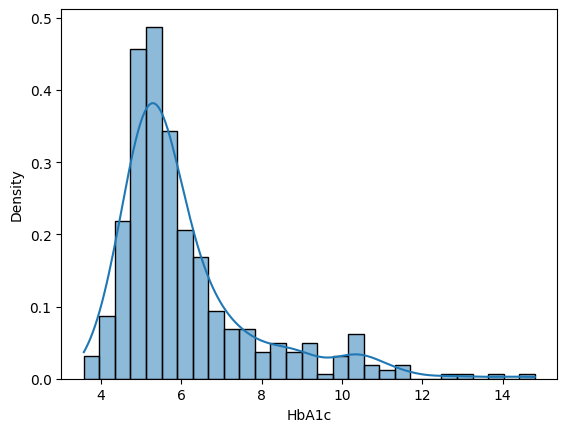

In [5]:
sns.histplot(y, kde=True, stat='density')
mean = y.mean()
std = y.std()
print(f"Mean: {mean:.4f}, std : {std:.4f}")

<Figure size 640x480 with 0 Axes>

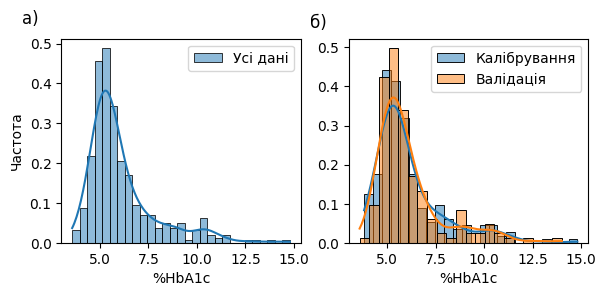

In [6]:
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform', subsample=None, random_state=24)
categories = discretizer.fit_transform(y.to_numpy().reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=categories, random_state=44)

plt.clf()
fig, axs = plt.subplots(1, 2, figsize=(6.8, 3))
sns.histplot(y_train, kde=True, stat='density', label='Калібрування', ax=axs[1])
sns.histplot(y_test, kde=True, stat='density', label='Валідація', ax=axs[1])
sns.histplot(y, kde=True, stat='density', label='Усі дані', ax=axs[0])
axs[1].set_xlabel("%HbA1c")
axs[1].set_ylabel(None)
axs[0].set_ylabel("Частота")
axs[0].set_xlabel("%HbA1c")
axs[0].legend()
axs[1].legend()
axs[0].text(1, 0.55, "а)", fontsize=12)
axs[1].text(1, 0.55, "б)", fontsize=12)
plt.subplots_adjust(bottom=0.2)
#plt.savefig("figures/dataset_split.png", dpi=200)
#plt.savefig("figures/dataset_split.pgf")

In [7]:
index1 = np.array([ 436.3228,  436.8049,  468.6252,  498.999 ,  505.7487,  506.713 ,
        518.7661,  543.3544,  558.7825,  559.2646,  560.2288,  560.7109,
        580.478 ,  581.4423,  607.4771,  607.9592,  662.4392,  662.9214,
        681.2421,  697.6343,  699.0807,  712.5802,  714.0266,  714.9908,
        736.2043,  736.6864,  737.1685,  826.8438,  828.7722,  829.2543,
        839.379 ,  840.3432,  840.8253,  929.0541,  929.5363,  962.8029,
        963.285 ,  997.0337,  997.5158,  997.9979, 1000.891 , 1001.855 ,
       1003.301 , 1013.426 , 1020.176 , 1021.14  , 1021.622 , 1022.104 ,
       1022.586 , 1023.551 , 1025.961 , 1026.925 , 1027.89  , 1028.372 ,
       1029.336 , 1029.818 , 1030.3   , 1030.782 , 1031.265 , 1031.747 ,
       1032.229 , 1032.711 , 1033.193 , 1034.157 , 1034.639 , 1061.156 ,
       1062.12  , 1071.763 , 1072.245 , 1073.209 , 1073.692 , 1075.62  ,
       1076.102 , 1076.584 , 1077.066 , 1077.548 , 1078.031 , 1078.995 ,
       1079.477 , 1079.959 , 1080.441 , 1080.923 , 1081.406 , 1081.888 ,
       1082.37  , 1083.334 , 1092.494 , 1094.423 , 1095.387 , 1125.279 ,
       1126.243 , 1127.207 , 1150.831 , 1160.956 , 1162.402 , 1182.17  ,
       1183.616 , 1185.062 , 1197.598 , 1198.562 , 1199.526 , 1200.008 ,
       1203.383 , 1204.347 , 1206.276 , 1223.632 , 1226.525 , 1272.327 ,
       1273.773 , 1274.737 , 1298.844 , 1299.326 , 1299.808 , 1300.772 ,
       1324.878 , 1325.843 , 1350.431 , 1399.608 , 1400.09  , 1400.572 ,
       1401.536 , 1405.393 , 1420.339 , 1469.998 , 1509.532 , 1511.461 ,
       1511.943 , 1512.907 , 1513.389 , 1602.1   , 1603.064 , 1604.511 ,
       1609.814 , 1610.778 , 1611.26  , 1611.743 , 1612.707 , 1643.563 ,
       1675.383 , 1701.418 , 1702.382 , 1702.864 , 1703.346 , 1703.828 ,
       1704.793 , 1705.275 , 1705.757 , 1706.239 , 1706.721 , 1708.167 ,
       1807.003 , 1807.485 , 1807.967 , 1813.753 , 1814.717 , 1821.467 ,
       1821.949 , 1822.431 , 1826.77  , 1828.217 , 1828.699 , 1840.27  ,
       1841.234 , 1887.518 , 1888.    , 1888.482 , 1928.498 , 1947.783 ,
       1948.748 , 1949.23  , 1994.067 , 1995.032 , 2023.477 , 2035.048 ,
       2039.869 , 2040.351 , 2040.833 , 2048.547 , 2049.03  , 2062.529 ,
       2063.975 , 2068.797 , 2080.368 , 2085.671 , 2086.153 , 2087.117 ,
       2092.903 , 2106.402 , 2114.599 , 2116.045 , 2158.472 , 2171.489 ,
       2171.971 , 2221.148 , 2221.63  , 2233.201 , 2233.683 , 2234.166 ,
       2252.486 , 2252.968 , 2282.378 , 2283.342 , 2283.824 , 2284.306 ,
       2284.789 , 2355.179 , 2404.355 , 2404.838 , 2440.515 , 2475.228 ,
       2475.71  , 2490.656 , 2491.62  , 2492.102 , 2513.798 , 2553.332 ,
       2602.026 , 2602.509 , 2608.294 , 2619.865 , 2620.829 , 2621.312 ,
       2691.219 , 2736.539 , 2770.77  , 2775.591 , 2776.556 , 2829.107 ,
       2829.589 , 2884.552 , 2885.034 , 2885.998 , 2886.48  , 2887.444 ,
       2887.926 , 2888.408 , 2888.891 , 2893.712 , 2894.676 , 2895.158 ,
       2981.458 , 3006.529 , 3010.386 , 3010.868 , 3016.172 , 3037.867 ,
       3038.349 , 3054.741 , 3061.009 , 3075.473 , 3100.061 , 3107.775 ,
       3108.257 , 3109.222 , 3131.881 , 3132.846 , 3133.328 , 3160.809 ,
       3161.773 , 3220.592 , 3221.074 , 3230.717 , 3250.484 , 3272.18  ,
       3272.662 , 3334.856 , 3335.338 , 3335.82  , 3336.302 , 3339.677 ,
       3341.124 , 3356.552 , 3378.247 , 3399.46  , 3399.943 , 3400.425 ,
       3433.691 , 3435.138 , 3454.905 , 3455.387 , 3479.975 , 3480.458 ,
       3495.885 , 3615.935 , 3641.969 , 3684.878 , 3685.36  , 3766.357 ,
       3767.804 , 3768.286 , 3784.196 , 3784.678 , 3785.16  , 3806.374 ,
       3833.373 , 3833.855 , 3878.692 , 3879.175 , 3917.262 , 3938.476 ,
       3938.958 , 3964.51  , 3964.993 , 3965.475 , 3978.974 , 3980.421 ,
       3984.76  , 3985.242 , 3985.724 ])

index2 = np.array([ 437.7692,  467.6609,  468.143 ,  486.4637,  486.9459,  499.4811,
        499.9633,  500.4454,  500.9275,  518.284 ,  518.7661,  519.2482,
        533.712 ,  534.6762,  538.5332,  539.4974,  539.9796,  540.4617,
        540.9438,  543.3544,  559.2646,  559.7467,  560.2288,  560.7109,
        561.1931,  561.6752,  581.9244,  608.4413,  608.9234,  609.4055,
        625.7978,  626.2799,  649.4219,  661.9571,  663.4035,  664.3677,
        681.7242,  697.6343,  699.5628,  712.0981,  712.5802,  713.0623,
        714.0266,  735.7222,  737.1685,  737.6507,  763.2032,  789.238 ,
        826.3616,  827.3259,  827.808 ,  828.7722,  839.8611,  840.8253,
        841.3074,  841.7896,  927.1256,  927.6078,  928.0899,  928.572 ,
        929.0541,  929.5363,  930.0184,  947.857 ,  983.5342,  984.0164,
        984.9806,  985.4627,  986.4269,  997.0337,  997.5158,  997.9979,
        998.4801,  999.4443, 1000.409 , 1001.373 , 1001.855 , 1002.819 ,
       1003.301 , 1003.783 , 1012.462 , 1013.908 , 1014.39  , 1017.765 ,
       1018.247 , 1018.729 , 1020.176 , 1020.658 , 1021.14  , 1021.622 ,
       1022.586 , 1023.068 , 1023.551 , 1024.033 , 1025.479 , 1025.961 ,
       1026.925 , 1027.89  , 1028.372 , 1028.854 , 1029.336 , 1029.818 ,
       1030.3   , 1030.782 , 1031.265 , 1031.747 , 1032.229 , 1032.711 ,
       1033.193 , 1033.675 , 1034.157 , 1034.639 , 1035.122 , 1062.12  ,
       1062.603 , 1063.085 , 1073.209 , 1074.174 , 1074.656 , 1075.138 ,
       1075.62  , 1076.102 , 1076.584 , 1077.066 , 1078.031 , 1078.513 ,
       1078.995 , 1079.477 , 1079.959 , 1080.441 , 1080.923 , 1081.406 ,
       1081.888 , 1082.37  , 1082.852 , 1083.816 , 1092.494 , 1092.976 ,
       1093.941 , 1094.423 , 1094.905 , 1124.797 , 1125.761 , 1126.725 ,
       1161.438 , 1161.92  , 1162.402 , 1162.885 , 1179.759 , 1180.241 ,
       1181.687 , 1182.17  , 1182.652 , 1183.616 , 1184.098 , 1197.115 ,
       1197.598 , 1198.08  , 1198.562 , 1199.044 , 1199.526 , 1200.49  ,
       1200.972 , 1203.383 , 1203.865 , 1204.347 , 1204.829 , 1205.312 ,
       1206.276 , 1224.597 , 1226.043 , 1226.525 , 1246.292 , 1247.256 ,
       1273.291 , 1273.773 , 1274.255 , 1279.559 , 1298.844 , 1299.808 ,
       1300.772 , 1301.254 , 1302.219 , 1302.701 , 1323.914 , 1324.396 ,
       1324.878 , 1325.361 , 1349.949 , 1350.913 , 1351.877 , 1397.679 ,
       1398.161 , 1399.608 , 1401.536 , 1402.5   , 1402.983 , 1403.947 ,
       1470.48  , 1470.962 , 1471.444 , 1508.568 , 1509.05  , 1509.532 ,
       1510.496 , 1511.943 , 1512.425 , 1528.817 , 1531.71  , 1601.136 ,
       1602.1   , 1603.064 , 1603.546 , 1604.029 , 1604.993 , 1609.332 ,
       1609.814 , 1610.296 , 1610.778 , 1611.26  , 1611.743 , 1612.225 ,
       1675.383 , 1701.9   , 1702.382 , 1702.864 , 1703.346 , 1704.311 ,
       1704.793 , 1705.275 , 1705.757 , 1706.239 , 1706.721 , 1707.203 ,
       1707.685 , 1789.164 , 1800.735 , 1807.003 , 1807.967 , 1808.449 ,
       1808.932 , 1813.271 , 1814.235 , 1814.717 , 1815.199 , 1821.467 ,
       1821.949 , 1822.431 , 1822.913 , 1823.877 , 1824.359 , 1826.77  ,
       1827.252 , 1827.734 , 1828.217 , 1828.699 , 1829.181 , 1829.663 ,
       1840.27  , 1840.752 , 1841.234 , 1841.716 , 1871.126 , 1877.875 ,
       1888.    , 1888.964 , 1894.268 , 1926.57  , 1927.052 , 1927.534 ,
       1928.016 , 1928.498 , 1928.981 , 1945.855 , 1946.337 , 1946.819 ,
       1947.301 , 1948.266 , 1949.23  , 1963.211 , 1993.103 , 1993.585 ,
       1994.549 , 2023.477 , 2023.959 , 2039.387 , 2039.869 , 2040.351 ,
       2040.833 , 2048.547 , 2063.011 , 2063.493 , 2067.833 , 2069.279 ,
       2078.439 , 2078.921 , 2079.403 , 2079.885 , 2084.707 , 2085.189 ,
       2085.671 , 2086.153 , 2086.635 , 2105.438 , 2106.402 , 2115.081 ,
       2115.563 , 2116.045 , 2116.527 , 2135.33  , 2156.061 , 2156.543 ,
       2157.025 , 2157.99  , 2171.007 , 2219.702 , 2220.184 , 2220.666 ,
       2233.201 , 2233.683 , 2234.647 , 2245.736 , 2246.219 , 2246.701 ,
       2251.522 , 2252.004 , 2252.968 , 2253.45  , 2253.933 , 2282.378 ,
       2283.342 , 2283.824 , 2284.306 , 2284.789 , 2285.753 , 2403.873 ,
       2404.838 , 2414.962 , 2439.551 , 2440.997 , 2441.479 , 2443.407 ,
       2443.89  , 2475.228 , 2476.192 , 2490.656 , 2492.102 , 2513.798 ,
       2514.28  , 2553.814 , 2602.026 , 2602.509 , 2602.991 , 2607.33  ,
       2608.294 , 2611.669 , 2618.901 , 2619.383 , 2619.865 , 2620.347 ,
       2620.829 , 2624.204 , 2660.846 , 2683.506 , 2736.539 , 2754.86  ,
       2771.252 , 2771.734 , 2775.109 , 2775.591 , 2776.073 , 2776.556 ,
       2777.038 , 2885.034 , 2885.516 , 2885.998 , 2886.48  , 2886.962 ,
       2887.444 , 2887.926 , 2888.408 , 2888.891 , 2893.712 , 2894.676 ,
       2895.158 , 2895.64  , 2896.123 , 2916.854 , 2981.458 , 2981.941 ,
       3006.529 , 3007.011 , 3008.458 , 3008.94  , 3010.386 , 3010.868 ,
       3011.35  , 3016.172 , 3016.654 , 3017.136 , 3026.296 , 3027.742 ,
       3037.385 , 3037.867 , 3052.813 , 3053.295 , 3053.777 , 3064.384 ,
       3065.83  , 3074.509 , 3100.061 , 3100.543 , 3107.775 , 3108.257 ,
       3108.74  , 3109.222 , 3130.917 , 3131.399 , 3131.881 , 3132.364 ,
       3132.846 , 3133.328 , 3140.56  , 3141.524 , 3160.327 , 3160.809 ,
       3161.291 , 3163.219 , 3174.308 , 3190.701 , 3220.592 , 3221.557 ,
       3222.039 , 3222.521 , 3230.235 , 3241.806 , 3270.251 , 3270.733 ,
       3334.374 , 3334.856 , 3335.338 , 3335.82  , 3336.302 , 3336.784 ,
       3337.267 , 3339.677 , 3340.159 , 3340.641 , 3341.606 , 3350.766 ,
       3357.516 , 3398.979 , 3399.46  , 3399.943 , 3400.425 , 3433.691 ,
       3434.656 , 3455.869 , 3473.226 , 3473.708 , 3474.19  , 3479.493 ,
       3479.975 , 3480.458 , 3480.94  , 3481.422 , 3568.204 , 3640.523 ,
       3641.487 , 3641.969 , 3684.878 , 3685.843 , 3686.325 , 3763.947 ,
       3766.357 , 3766.84  , 3767.804 , 3774.553 , 3775.518 , 3783.714 ,
       3784.196 , 3784.678 , 3785.16  , 3785.642 , 3786.125 , 3824.212 ,
       3824.695 , 3832.891 , 3833.373 , 3860.372 , 3878.21  , 3879.175 ,
       3929.798 , 3937.512 , 3937.994 , 3964.029 , 3965.475 , 3966.439 ,
       3978.974 , 3979.457 , 3979.938 , 3980.421 , 3980.903 , 3984.278 ,
       3984.76  , 3985.242 , 3986.206 , 3986.688 ])

index3 = np.array([ 436.3228,  467.6609,  468.143 ,  500.4454,  518.284 ,  518.7661,
        519.2482,  533.712 ,  539.0153,  539.4974,  543.8366,  559.7467,
        560.2288,  560.7109,  581.9244,  608.4413,  662.4392,  680.7599,
        712.5802,  713.5444,  714.0266,  714.9908,  769.953 ,  778.1491,
        790.2023,  827.808 ,  839.379 ,  840.3432,  927.1256,  928.0899,
        928.572 ,  962.8029,  984.9806,  998.9622,  999.4443, 1002.337 ,
       1016.319 , 1020.176 , 1020.658 , 1021.14  , 1022.586 , 1023.068 ,
       1026.925 , 1027.408 , 1027.89  , 1028.372 , 1028.854 , 1029.336 ,
       1031.265 , 1032.229 , 1032.711 , 1033.193 , 1033.675 , 1034.157 ,
       1061.638 , 1062.603 , 1063.085 , 1072.727 , 1073.209 , 1074.656 ,
       1075.138 , 1075.62  , 1078.513 , 1079.477 , 1079.959 , 1080.441 ,
       1080.923 , 1081.406 , 1081.888 , 1083.334 , 1083.816 , 1094.423 ,
       1126.725 , 1161.438 , 1161.92  , 1162.402 , 1181.687 , 1182.17  ,
       1183.134 , 1199.044 , 1200.008 , 1203.383 , 1204.347 , 1246.292 ,
       1247.256 , 1271.363 , 1300.29  , 1300.772 , 1323.914 , 1324.396 ,
       1399.126 , 1509.532 , 1510.014 , 1510.979 , 1511.943 , 1602.582 ,
       1603.064 , 1604.029 , 1610.778 , 1611.743 , 1642.116 , 1674.901 ,
       1704.311 , 1704.793 , 1705.275 , 1705.757 , 1706.239 , 1807.003 ,
       1807.485 , 1807.967 , 1814.235 , 1815.199 , 1820.985 , 1822.431 ,
       1823.395 , 1828.699 , 1829.181 , 1840.752 , 1841.234 , 1894.268 ,
       1927.534 , 1929.463 , 1946.819 , 1949.712 , 1994.549 , 1995.032 ,
       2035.048 , 2035.53  , 2040.351 , 2041.316 , 2048.065 , 2064.458 ,
       2068.314 , 2068.797 , 2085.189 , 2086.153 , 2087.117 , 2105.92  ,
       2115.081 , 2115.563 , 2157.508 , 2220.666 , 2221.63  , 2232.237 ,
       2239.469 , 2246.701 , 2252.004 , 2252.486 , 2252.968 , 2282.378 ,
       2282.86  , 2284.306 , 2284.789 , 2374.946 , 2404.355 , 2404.838 ,
       2441.479 , 2442.925 , 2474.746 , 2475.71  , 2492.102 , 2492.584 ,
       2500.78  , 2514.762 , 2538.386 , 2553.332 , 2602.026 , 2602.991 ,
       2619.383 , 2620.347 , 2671.935 , 2683.988 , 2708.094 , 2724.968 ,
       2754.86  , 2755.342 , 2776.073 , 2776.556 , 2884.069 , 2886.48  ,
       2886.962 , 2887.444 , 2888.408 , 2889.373 , 2895.158 , 2915.407 ,
       2915.89  , 3009.422 , 3009.904 , 3017.136 , 3017.618 , 3024.368 ,
       3053.777 , 3055.224 , 3063.42  , 3107.775 , 3108.257 , 3109.222 ,
       3131.881 , 3132.364 , 3160.809 , 3161.291 , 3161.773 , 3162.255 ,
       3180.576 , 3181.058 , 3190.219 , 3191.183 , 3220.592 , 3232.646 ,
       3240.842 , 3271.215 , 3272.18  , 3280.858 , 3335.338 , 3335.82  ,
       3336.302 , 3340.159 , 3340.641 , 3341.124 , 3350.284 , 3356.552 ,
       3378.247 , 3398.979 , 3433.691 , 3453.941 , 3455.387 , 3479.493 ,
       3480.94  , 3608.703 , 3641.487 , 3641.969 , 3642.451 , 3732.609 ,
       3765.875 , 3767.804 , 3784.678 , 3785.642 , 3786.125 , 3833.373 ,
       3833.855 , 3879.657 , 3916.78  , 3928.833 , 3938.476 , 3965.475 ,
       3965.957 , 3978.974 , 3980.903 , 3984.76  , 3985.724 ])

index4 = np.array([  59,   60,   94,  160,  161,  162,  163,  219,  285,  298,  300,
        309,  310,  312,  313,  335,  380,  440,  463,  472,  522,  524,
        525,  641,  642,  704,  722,  730,  742,  744,  834,  858,  859,
        866,  867,  891,  892,  893,  924,  936, 1025, 1064, 1209, 1237,
       1238, 1239, 1240, 1242, 1243, 1249, 1250, 1251, 1252, 1253, 1254,
       1297, 1299, 1300, 1302, 1303, 1304, 1307, 1308, 1309, 1310, 1311,
       1317, 1318, 1319, 1320, 1336, 1337, 1338, 1363, 1372, 1373, 1374,
       1375, 1377, 1378, 1399, 1401, 1402, 1403, 1404, 1405, 1407, 1408,
       1412, 1414, 1415, 1429, 1431, 1434, 1435, 1436, 1438, 1440, 1441,
       1442, 1443, 1446, 1448, 1547, 1561, 1562, 1578, 1579, 1594, 1596,
       1614, 1616, 1636, 1656, 1691, 1719, 1720, 1747, 1756, 1759, 1773,
       1785, 1824, 1825, 1840, 1867, 1868, 1926, 1928, 2077, 2079, 2081,
       2082, 2084, 2085, 2086, 2106, 2107, 2108, 2109, 2110, 2112, 2132,
       2173, 2351, 2354, 2365, 2366, 2573, 2574, 2629, 2630, 2632, 2644,
       2645, 2660, 2677, 2682, 2703, 2704, 2705, 2706, 2707, 2790, 2815,
       2816, 2829, 2886, 2887, 2900, 2938, 2954, 2955, 2956, 2957, 2959,
       2970, 2971, 2972, 3008, 3009, 3016, 3111, 3112, 3127, 3129, 3293,
       3303, 3305, 3319, 3320, 3330, 3354, 3395, 3431, 3432, 3470, 3479,
       3506, 3515, 3516, 3517, 3531, 3569, 3608, 3619, 3686, 3687, 3817,
       3818, 3838, 3888, 3890, 3903, 3925, 3927, 3947, 3949, 4005, 4006,
       4037, 4051, 4075, 4076, 4085, 4086, 4102, 4183, 4213, 4214, 4239,
       4250, 4281, 4290, 4291, 4337, 4377, 4396, 4397, 4398, 4403, 4404,
       4415, 4507, 4545, 4546, 4548, 4565, 4592, 4593, 4594, 4609, 4677,
       4831, 4844, 4862, 4888, 4913, 4951, 4952, 4960, 4983, 4984, 5072,
       5090, 5093, 5122, 5124, 5127, 5138, 5139, 5150, 5151, 5152, 5178,
       5179, 5184, 5239, 5240, 5294, 5296, 5341, 5342, 5352, 5405, 5416,
       5443, 5502, 5525, 5526, 5527, 5529, 5570, 5635, 5636, 5638, 5697,
       5706, 5707, 5709, 5756, 5758, 5759, 5872, 5874, 5900, 5901, 5968,
       6011, 6079, 6080, 6081, 6093, 6107, 6143, 6154, 6171, 6172, 6239,
       6240, 6242, 6312, 6313, 6341, 6356, 6394, 6407, 6408, 6409, 6451,
       6477, 6631, 6641, 6649, 6650, 6730, 6731, 6743, 6744, 6745, 6755,
       6886, 6887, 7011, 7044, 7065, 7095, 7107, 7111, 7122, 7155, 7169,
       7189, 7191, 7217, 7218, 7369, 7370, 7371, 7373, 7374, 7388, 7444,
       7445, 7462]) # w=25 o=2 deriv=2

In [8]:
class CARS:
    def __init__(self):
        self.weights = []
        self.retain_num = []
        self.retain_ratio = []
        self.r2s = []
        self.rmses = []

    def fit(self, X, y, n_comp, n_rep):
        self.n_samples, self.n_features = X.shape
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
        model = PLSRegression(n_components=n_comp)
        model.fit(X_train, y_train)
        
        weights = np.abs(model.coef_[0]) / np.sum(np.abs(model.coef_[0]))
        self.weights.append(weights)
        
        for i in range(1, n_rep + 1):
            
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
            
            pls = PLSRegression(n_components=n_comp)
            pls.fit(X_train, y_train)
        
            a = (self.n_features / 2)**(1 / (n_rep - 1))
            k = np.log(self.n_features / 2) / (n_rep - 1)
            retain_ratio = a * np.exp(-(k * i))
            retain_ratio = 1 if retain_ratio > 0.99 else retain_ratio
            retain_num = int(self.n_features * retain_ratio)
        
            sampled_indices = np.random.choice(np.arange(self.n_features), size=retain_num, replace=False, p=weights)
        
            X_sampled = X_train.iloc[:, sampled_indices]
    
            if len(X_sampled.columns) <= n_comp:
                self.weights = np.array(self.weights)
                self.retain_num = np.array(self.retain_num)
                self.retain_ratio = np.array(self.retain_ratio)
                self.r2s = np.array(self.r2s)
                self.rmses = np.array(self.rmses)
                return 
    
            pls = PLSRegression(n_components=n_comp)
            pls.fit(X_sampled, y_train)
            y_cv = cross_val_predict(pls, X_sampled, y_train, cv=10)
    
    
            reg_coef = np.zeros(self.n_features)
            reg_coef[sampled_indices] = np.abs(pls.coef_[0]) / np.sum(np.abs(pls.coef_[0]))
            unselected_indices = np.setdiff1d(np.arange(self.n_features), sampled_indices)
            reg_coef[unselected_indices] = 0
            weights = reg_coef
            
            self.weights.append(weights)
            self.retain_num.append(retain_num)
            self.retain_ratio.append(retain_ratio)
            self.r2s.append(r2_score(y_train, y_cv))
            self.rmses.append(np.sqrt(mean_squared_error(y_train, y_cv)))
            #print(r2_score(y_train, y_cv))

        self.weights = np.array(self.weights)
        self.retain_num = np.array(self.retain_num)
        self.retain_ratio = np.array(self.retain_ratio)
        self.r2s = np.array(self.r2s)
        self.rmses = np.array(self.rmses)
    
        return

    def get_features(self):
        index = np.argmax(self.r2s)
        print(f"R2: {np.max(self.r2s)}\nRMSE: {np.min(self.rmses)}\nIndex: {index}")        
        return np.where(self.weights[index] > 0)[0]

In [9]:
# cars = CARS()
# cars.fit(X, y, 10, 200)
# idx = cars.get_features()
# print(len(idx))
# idx

In [10]:
idx = domain[domain['0'].isin(index3)].index.to_numpy()
idx = index4
# select = np.argmax(cars.r2s)
# plt.plot(domain, cars.weights[select])

In [11]:
np.ravel(domain)[idx]

array([ 428.6088,  429.0909,  445.4832,  477.3034,  477.7855,  478.2676,
        478.7498,  505.7487,  537.569 ,  543.8366,  544.8008,  549.14  ,
        549.6221,  550.5863,  551.0685,  561.6752,  583.3708,  612.2983,
        623.3871,  627.7263,  651.8325,  652.7968,  653.2789,  709.2053,
        709.6874,  739.5792,  748.2574,  752.1144,  757.8999,  758.8641,
        802.2554,  813.8264,  814.3085,  817.6833,  818.1655,  829.7365,
        830.2186,  830.7007,  845.6466,  851.4321,  894.3412,  913.144 ,
        983.0521,  996.5516,  997.0337,  997.5158,  997.9979,  998.9622,
        999.4443, 1002.337 , 1002.819 , 1003.301 , 1003.783 , 1004.266 ,
       1004.748 , 1025.479 , 1026.443 , 1026.925 , 1027.89  , 1028.372 ,
       1028.854 , 1030.3   , 1030.782 , 1031.265 , 1031.747 , 1032.229 ,
       1035.122 , 1035.604 , 1036.086 , 1036.568 , 1044.282 , 1044.764 ,
       1045.246 , 1057.299 , 1061.638 , 1062.12  , 1062.603 , 1063.085 ,
       1064.049 , 1064.531 , 1074.656 , 1075.62  , 

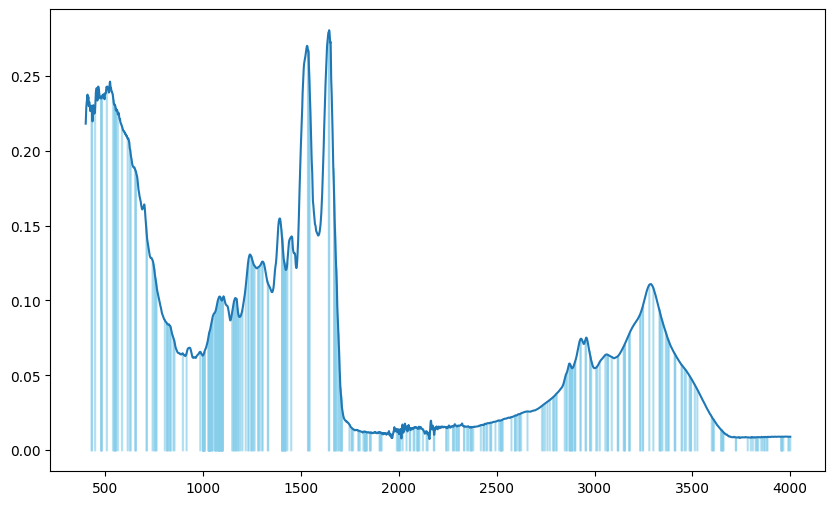

In [12]:
absorbance = df.drop(columns=['HbA1c', 'years']).iloc[0]
x_values = np.ravel(domain)
absorbance.index = x_values

plt.figure(figsize=(10, 6))
plt.plot(absorbance)

for index in idx:
    plt.fill_between(x_values[max(0, index-5):min(len(x_values), index+6)], 0, absorbance.iloc[max(0, index-5):min(len(x_values), index+6)], color='skyblue', alpha=0.5)

In [13]:
X_cut = X.iloc[:, idx]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_cut, y, test_size=0.4, stratify=categories, random_state=44) # random state 44

┌──────────────────────────┐
│       FIT RESULTS        │
├──────────────────────────┤
│ RMSE = 0.6759            │
│ R2 = 0.8531              │
│ R = 0.9241               │
│ Number of components = 7 │
└──────────────────────────┘


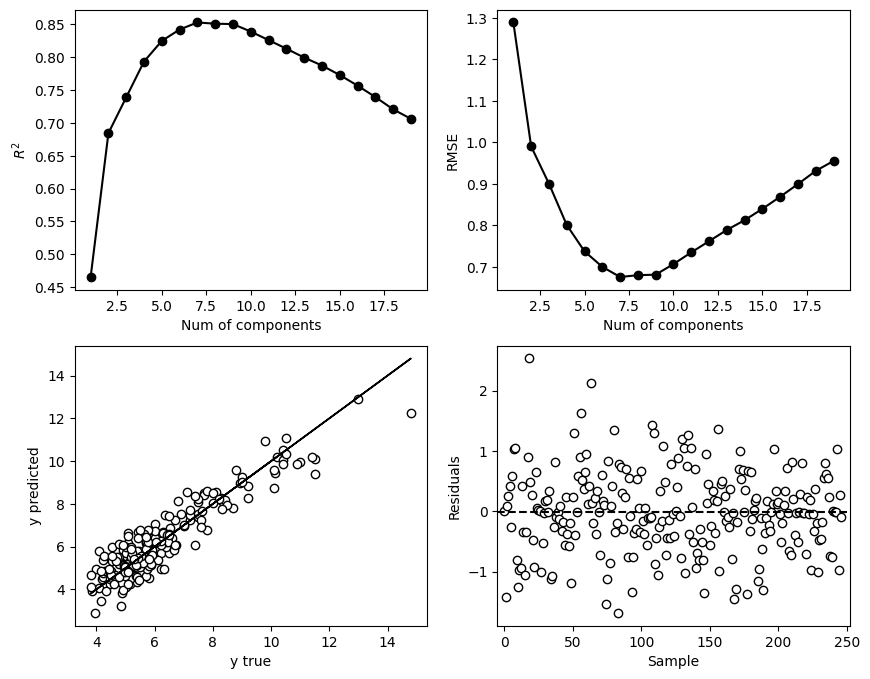

In [15]:
fig, axs = plot_number_components(X_train, y_train, cv=10, number_range=(1, 20))
# fig.set_size_inches(6.75, 5.75)
# axs[0, 0].set_xlabel("Кількість компонент")
# axs[0, 1].set_xlabel("Кількість компонент")
# axs[0, 1].set_ylabel("PRESS")
# axs[1, 0].set_xlabel("%HbA1c виміряне")
# axs[1, 0].set_ylabel("%HbA1c передбачене")
# axs[1, 1].set_xlabel("Зразок")
# axs[1, 1].set_ylabel("Залишок")
#fig.savefig("figures/training.pgf")

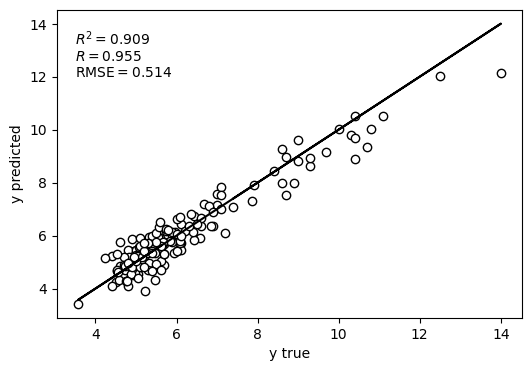

In [16]:
pls = PLSRegression(n_components=7)
pls.fit(X_train, y_train)
y_pred = pls.predict(X_test)
fig, axs = plsr_r2_plot(y_test, y_pred)
# axs.set_xlabel("%HbA1c виміряне")
# axs.set_ylabel("%HbA1c передбачене")
# fig.set_size_inches(4, 3)
# fig.subplots_adjust(bottom=0.15)
#fig.savefig("figures/test_data.pgf")

In [17]:
def variance_in_y(model, y):
    r2_sum = 0
    
    for i in range(0, 7):
        t = pls.x_scores_[:, i].reshape(-1,1)
        u = pls.y_loadings_[:, i].reshape(-1,1).T
        y_pred = np.dot(t, u) + y_train.mean(axis=0) # mean added because the data is scaled during PLSR
        r2 = r2_score(y_train, y_pred)
        r2_sum += r2
        print('R2 for %d component: %g. Total: %g' %(i+1, round(r2, 3), round(r2_sum, 3)))

variance_in_y(pls, y_train)

R2 for 1 component: 0.436. Total: 0.436
R2 for 2 component: 0.233. Total: 0.669
R2 for 3 component: 0.046. Total: 0.716
R2 for 4 component: 0.019. Total: 0.734
R2 for 5 component: 0.026. Total: 0.76
R2 for 6 component: 0.015. Total: 0.775
R2 for 7 component: 0.008. Total: 0.782


In [18]:
# domain = pd.read_csv('data/domain.csv')
# df = pd.read_csv('data/dataset.csv')
# X = df.drop(columns=['HbA1c', 'years'])
# y = df['HbA1c']
# X.columns = np.ravel(domain)

# X = X.T.apply(lambda col: savgol_filter(col, window_length=20, polyorder=2, deriv=2)).T
# X = X.apply(lambda row: row / np.linalg.norm(row), axis=1)
# cars = CARS()
# cars.fit(X, y, 10, 200)
# idx = cars.get_features()

In [19]:
# X_cut = X.iloc[:, idx]
# X_train, X_test, y_train, y_test = train_test_split(X_cut, y, test_size=0.4, stratify=categories, random_state=44) # random state 44
# plot_number_components(X_train, y_train, cv=10, number_range=(1, 20))

In [20]:
# pls = PLSRegression(n_components=10)
# pls.fit(X_train, y_train)
# y_pred = pls.predict(X_test)
# plsr_r2_plot(y_test, y_pred)

In [21]:
# from tools.outliers import MonteCarloOutliers
# model = MonteCarloOutliers()
# model.fit(X_cut, y)
# model.plot_accumulative_means()
# model.plot_samples(400, std_num=3)

Text(0, 0.5, '$t_2$')

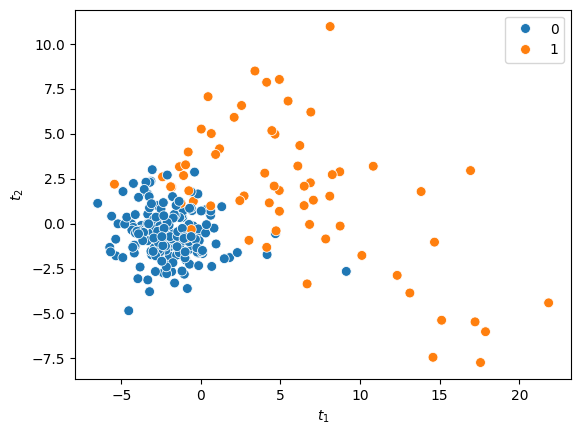

In [22]:
t1 = pls.x_scores_[:, 0]
t2 = pls.x_scores_[:, 1]
db = np.where(y_train >= 6.5, 1, 0)
# db = pd.Series(db)
# db = db.map({1: "Diabetes", 0: "Healthy"})

components = pd.DataFrame({
    "t1": t1,
    "t2": t2,
    "diabetes": db
})

sns.scatterplot(data=components, x=t1, y=t2, hue=db, s=50)
plt.legend(title=None)
plt.xlabel('$t_1$')
plt.ylabel('$t_2$')

In [23]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [24]:
X_train_clf = components[['t1', 't2']].to_numpy()
y_train_clf = db

clf = RandomForestClassifier(n_estimators=100, max_depth=None)
clf.fit(X_train_clf, y_train_clf)

RandomForestClassifier()

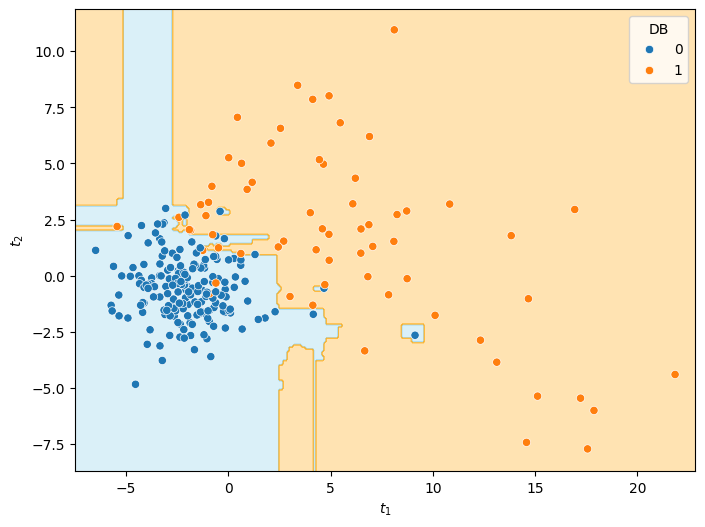

In [25]:
x_min, x_max = X_train_clf[:, 0].min() - 1, X_train_clf[:, 0].max() + 1
y_min, y_max = X_train_clf[:, 1].min() - 1, X_train_clf[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict for each point on the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#87CEEB', '#FFA500'])  # Blue and orange colors
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.3)

# Plot data points
sns.scatterplot(data=components, x=t1, y=t2, hue=db)

plt.xlabel('$t_1$')
plt.ylabel('$t_2$')
plt.legend(title='DB')
# Plot data points

In [26]:
X_test_clf = pls.transform(X_test)[:, [0, 1]]
y_test_clf = np.where(y_test >= 6.5, 1, 0)
y_test_clf

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [27]:
y_pred = clf.predict(X_test_clf)
accuracy = accuracy_score(y_test_clf, y_pred)
accuracy

0.8734939759036144

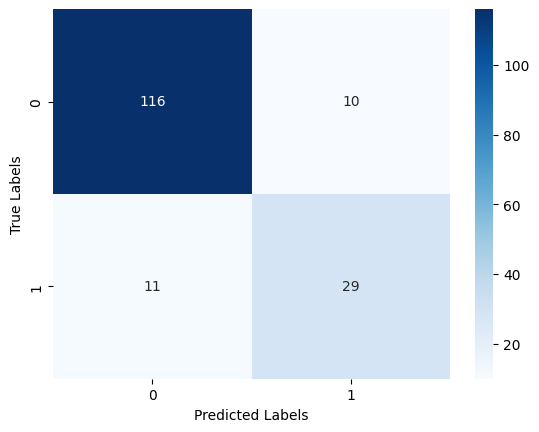

In [28]:
def confusion_matrix_plot(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    #labels_x = ['Negative (0)', 'Positive (1)']
    #labels_y = ['Positive (1)', 'Negative (0)']
    
    #plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

confusion_matrix_plot(y_test_clf, y_pred)

In [29]:
clf = RandomForestClassifier()
clf.fit(pls.x_scores_, y_train_clf)

RandomForestClassifier()

In [30]:
y_pred = clf.predict(pls.transform(X_test))
accuracy = accuracy_score(y_test_clf, y_pred)
accuracy

0.9096385542168675

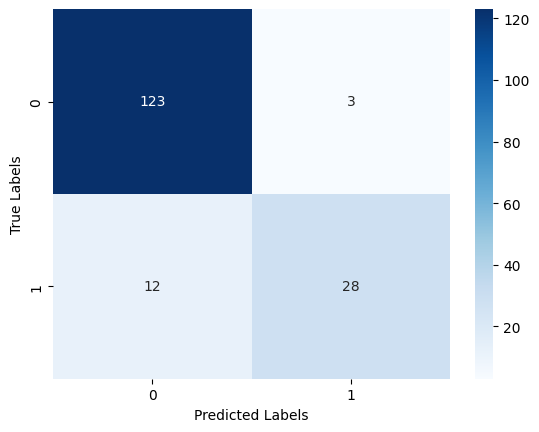

In [31]:
confusion_matrix_plot(y_test_clf, y_pred)

Specificity: 0.9603174603174603
Sensitivity: 0.85
Accuracy:  0.9337349397590361


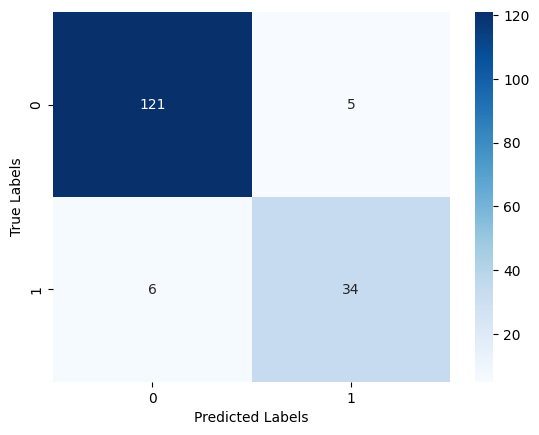

In [32]:
y_pred = pls.predict(X_test)
y_pred_clf = np.where(y_pred >= 6.5, 1, 0)
confusion_matrix_plot(y_test_clf, y_pred_clf)
cm = confusion_matrix(y_test_clf, y_pred_clf)

tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

sensitivity = tp / (tp + fn)

print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("Accuracy: ", accuracy_score(y_test_clf, y_pred_clf))

In [33]:
domain = pd.read_csv('data/domain.csv')
df = pd.read_csv('data/dataset.csv')
X = df.drop(columns=['HbA1c', 'years'])
y = df['HbA1c']
X.columns = np.ravel(domain)

#X = X.apply(lambda row: row / max(row), axis=1)
X = X.T.apply(lambda col: savgol_filter(col, window_length=40, polyorder=2, deriv=2)).T
X = X.apply(lambda row: row / np.linalg.norm(row), axis=1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=categories, random_state=44)

In [122]:
# %%time

# freq = np.zeros(len(X_train.columns))

# for i in range(500):
#     cars = CARS()
#     cars.fit(X_train, y_train, 10, 100)
#     idx = cars.get_features()
    
#     freq[idx] += 1

# pd.Series(freq).to_csv("data/freq.csv")

719

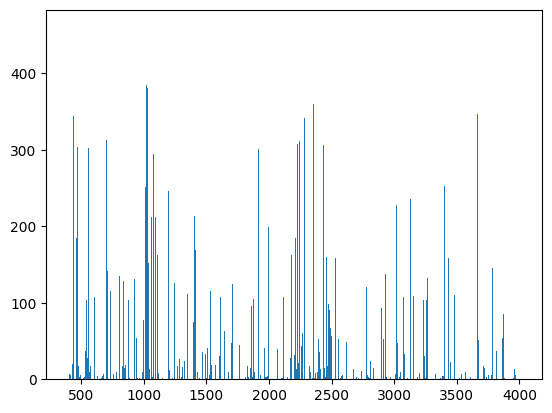

In [153]:
bins = np.arange(len(freq))
plt.bar(np.ravel(domain), freq)
(freq > 100).sum()

625

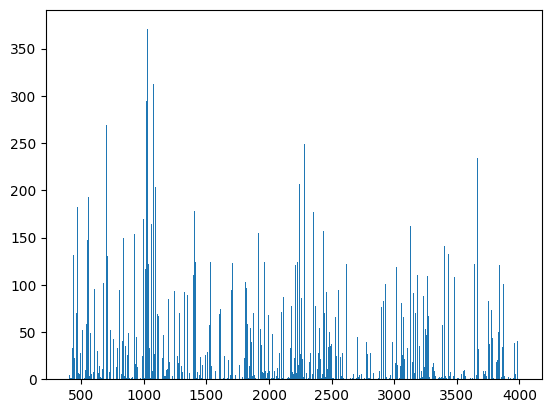

In [154]:
freq_w2 = savgol_filter(freq, window_length=10, polyorder=1)
plt.bar(np.ravel(domain), freq_w2)
(freq_w2 > 100).sum()

In [127]:
idx = np.where(freq > 100)[0]

┌──────────────────────────┐
│       FIT RESULTS        │
├──────────────────────────┤
│ RMSE = 0.5422            │
│ R2 = 0.9022              │
│ R = 0.9499               │
│ Number of components = 8 │
└──────────────────────────┘


(<Figure size 1000x800 with 4 Axes>,
 array([[<Axes: xlabel='Num of components', ylabel='$R^2$'>,
         <Axes: xlabel='Num of components', ylabel='RMSE'>],
        [<Axes: xlabel='y true', ylabel='y predicted'>,
         <Axes: xlabel='Sample', ylabel='Residuals'>]], dtype=object))

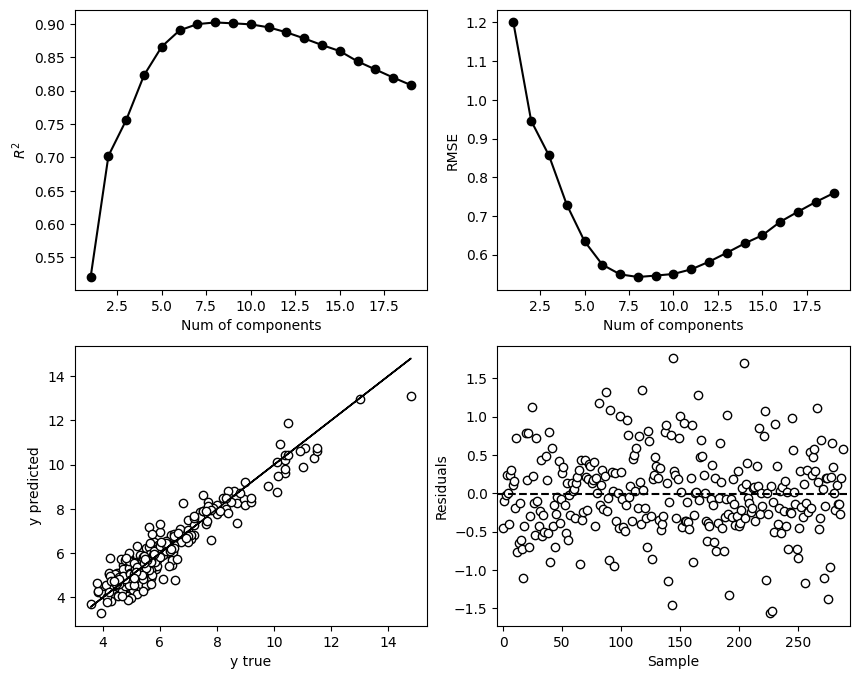

In [137]:
plot_number_components(X_train.iloc[:, idx], y_train, cv=5)

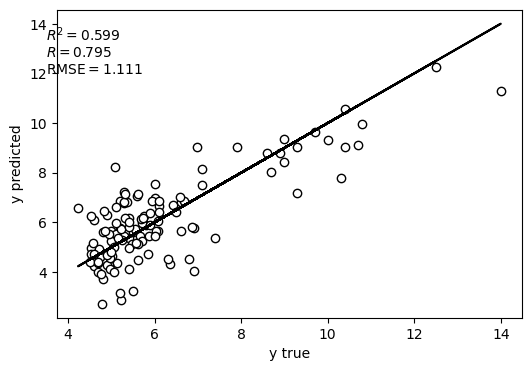

In [155]:
pls = PLSRegression(n_components=5)
pls.fit(X_train.iloc[:, idx], y_train)
y_pred = pls.predict(X_test.iloc[:, idx])
fig, axs = plsr_r2_plot(y_test, y_pred)